In [1]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width: 90% !important;}</style>"))

/var/folders/s2/bjtyvybn0kv3rwjkn5xht9_m0000gn/T/ipykernel_90286/3570109496.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import pandas as pd
import govt_func as gf
import datetime
from imp import reload

import numpy as np
from dateutil.relativedelta import *


# Import Data

In [3]:
deferred_uri = "cleaned_data/cleaned_deferred.csv"
df_deferred = pd.read_csv(deferred_uri)

nonfreq_uri = "cleaned_data/cleaned_nonfreq.csv"
df_nonfreq = pd.read_csv(nonfreq_uri)

other_uri = "cleaned_data/cleaned_other.csv"
df_other = pd.read_csv(other_uri)

return_uri = "cleaned_data/cleaned_return.csv"
df_return = pd.read_csv(return_uri)

capital_uri = "data/mkt_cap_month_freq.xlsx"
df_cap = pd.read_excel(capital_uri)

industry_ref = "data/industry_into_citics_1.txt"


# Get industry code mapping

In [4]:
file = open(industry_ref, "r")
industry_mapping = {}
line = file.readline().strip().split()
line = file.readline().strip().split()
while line != []:
    industry_mapping[line[1]] = int(line[0])
    line = file.readline().strip().split()
industry_mapping


{'石油石化': 10,
 '煤炭': 11,
 '有色金属': 12,
 '电力及公用事业': 20,
 '钢铁': 21,
 '基础化工': 22,
 '建筑': 23,
 '建材': 24,
 '轻工制造': 25,
 '机械': 26,
 '电力设备及新能源': 27,
 '国防军工': 28,
 '汽车': 30,
 '商贸零售': 31,
 '消费者服务': 32,
 '家电': 33,
 '纺织服装': 34,
 '医药': 35,
 '食品饮料': 36,
 '农林牧渔': 37,
 '银行': 40,
 '非银行金融': 41,
 '房地产': 42,
 '综合金融': 43,
 '交通运输': 50,
 '电子': 60,
 '通信': 61,
 '计算机': 62,
 '传媒': 63,
 '综合': 70}

# Merge All Factor Value

In [5]:
df_other = df_other.set_index(["QUARTER", "SECU_CODE", "INDUSTRY"])
df_nonfreq = df_nonfreq.set_index(["QUARTER", "SECU_CODE", "INDUSTRY"])
df = pd.merge(
    left=df_nonfreq,
    right=df_other,
    left_index=True,
    right_index=True,
    how="outer",
    suffixes=("_SUBSIDY", "_OTHER"),
)
df

F_SUPPORT_SUBSIDY  F_DEPENDENCE_SUBSIDY  \
QUARTER SECU_CODE INDUSTRY                                            
2011Q1  000009.SZ 综合                 1.458430             -0.543251   
        000012.SZ 建材                 1.629855             -0.437518   
        000016.SZ 家电                 1.497990              2.564561   
        000019.SZ 农林牧渔              -0.461529              2.564561   
        000020.SZ 电子                -1.517770             -0.547717   
...                                       ...                   ...   
2022Q3  688799.SH 医药                -0.114306             -0.570632   
        688800.SH 电子                -1.103734             -0.719448   
        688819.SH 电力设备及新能源           1.546257             -0.420753   
        688981.SH 电子                 1.696215             -0.365687   
        689009.SH 机械                -1.644024             -0.773081   

                            F_SUBSIDY  F_SUPPORT_OTHER  F_DEPENDENCE_OTHER  \
QUARTER SECU_CODE INDUSTRY                                                   
2011Q1  000009.SZ 综合         2.001681              NaN                 NaN   
        000012.SZ 建材         2.067373              NaN                 NaN   
        000016.SZ 家电        -1.066571              NaN                 NaN   
        000019.SZ 农林牧渔      -3.026089              NaN                 NaN   
        000020.SZ 电子        -0.970052              NaN                 NaN   
...                               ...              ...                 ...   
2022Q3  688799.SH 医药         0.456326        -0.146204           -0.615050   
        688800.SH 电子        -0.384286        -1.148131           -0.767875   
        688819.SH 电力设备及新能源   1.967011         1.506474           -0.471376   
        688981.SH 电子         2.061902         1.675612           -0.416715   
        689009.SH 机械        -0.870943        -0.861457           -0.796988   

                             F_OTHER  
QUARTER SECU_CODE INDUSTRY            
2011Q1  000009.SZ 综合             NaN  
        000012.SZ 建材             NaN  
        000016.SZ 家电             NaN  
        000019.SZ 农林牧渔           NaN  
        000020.SZ 电子             NaN  
...                              ...  
2022Q3  688799.SH 医药        0.468846  
        688800.SH 电子       -0.380256  
        688819.SH 电力设备及新能源  1.977850  
        688981.SH 电子        2.092327  
        689009.SH 机械       -0.064468  

[111638 rows x 6 columns]

In [6]:
df_deferred = df_deferred.set_index(["QUARTER", "SECU_CODE", "INDUSTRY"])
df = pd.merge(
    left=df, right=df_deferred, left_index=True, right_index=True, how="outer"
)
df

F_SUPPORT_SUBSIDY  F_DEPENDENCE_SUBSIDY  \
QUARTER SECU_CODE INDUSTRY                                            
2011Q1  000009.SZ 综合                 1.458430             -0.543251   
        000012.SZ 建材                 1.629855             -0.437518   
        000016.SZ 家电                 1.497990              2.564561   
        000019.SZ 农林牧渔              -0.461529              2.564561   
        000020.SZ 电子                -1.517770             -0.547717   
...                                       ...                   ...   
2022Q3  688799.SH 医药                -0.114306             -0.570632   
        688800.SH 电子                -1.103734             -0.719448   
        688819.SH 电力设备及新能源           1.546257             -0.420753   
        688981.SH 电子                 1.696215             -0.365687   
        689009.SH 机械                -1.644024             -0.773081   

                            F_SUBSIDY  F_SUPPORT_OTHER  F_DEPENDENCE_OTHER  \
QUARTER SECU_CODE INDUSTRY                                                   
2011Q1  000009.SZ 综合         2.001681              NaN                 NaN   
        000012.SZ 建材         2.067373              NaN                 NaN   
        000016.SZ 家电        -1.066571              NaN                 NaN   
        000019.SZ 农林牧渔      -3.026089              NaN                 NaN   
        000020.SZ 电子        -0.970052              NaN                 NaN   
...                               ...              ...                 ...   
2022Q3  688799.SH 医药         0.456326        -0.146204           -0.615050   
        688800.SH 电子        -0.384286        -1.148131           -0.767875   
        688819.SH 电力设备及新能源   1.967011         1.506474           -0.471376   
        688981.SH 电子         2.061902         1.675612           -0.416715   
        689009.SH 机械        -0.870943        -0.861457           -0.796988   

                             F_OTHER  F_SUPPORT  F_DEPENDENCE  F_DEFERRED  
QUARTER SECU_CODE INDUSTRY                                                 
2011Q1  000009.SZ 综合             NaN        NaN           NaN         NaN  
        000012.SZ 建材             NaN        NaN           NaN         NaN  
        000016.SZ 家电             NaN        NaN           NaN         NaN  
        000019.SZ 农林牧渔           NaN        NaN           NaN         NaN  
        000020.SZ 电子             NaN        NaN           NaN         NaN  
...                              ...        ...           ...         ...  
2022Q3  688799.SH 医药        0.468846   1.198285      0.333809    0.864475  
        688800.SH 电子       -0.380256   0.698050     -0.312493    1.010544  
        688819.SH 电力设备及新能源  1.977850   1.362780      0.031121    1.331659  
        688981.SH 电子        2.092327   0.767223      0.246840    0.520383  
        689009.SH 机械       -0.064468  -0.029103     -0.666340    0.637237  

[113747 rows x 9 columns]

In [7]:
df_gov = df.rename(
    columns={"F_SUPPORT": "F_SUPPORT_DEFERRED",
             "F_DEPENDENCE": "F_DEPENDENCE_DEFERRED"}
)
df_gov


F_SUPPORT_SUBSIDY  F_DEPENDENCE_SUBSIDY  \
QUARTER SECU_CODE INDUSTRY                                            
2011Q1  000009.SZ 综合                 1.458430             -0.543251   
        000012.SZ 建材                 1.629855             -0.437518   
        000016.SZ 家电                 1.497990              2.564561   
        000019.SZ 农林牧渔              -0.461529              2.564561   
        000020.SZ 电子                -1.517770             -0.547717   
...                                       ...                   ...   
2022Q3  688799.SH 医药                -0.114306             -0.570632   
        688800.SH 电子                -1.103734             -0.719448   
        688819.SH 电力设备及新能源           1.546257             -0.420753   
        688981.SH 电子                 1.696215             -0.365687   
        689009.SH 机械                -1.644024             -0.773081   

                            F_SUBSIDY  F_SUPPORT_OTHER  F_DEPENDENCE_OTHER  \
QUARTER SECU_CODE INDUSTRY                                                   
2011Q1  000009.SZ 综合         2.001681              NaN                 NaN   
        000012.SZ 建材         2.067373              NaN                 NaN   
        000016.SZ 家电        -1.066571              NaN                 NaN   
        000019.SZ 农林牧渔      -3.026089              NaN                 NaN   
        000020.SZ 电子        -0.970052              NaN                 NaN   
...                               ...              ...                 ...   
2022Q3  688799.SH 医药         0.456326        -0.146204           -0.615050   
        688800.SH 电子        -0.384286        -1.148131           -0.767875   
        688819.SH 电力设备及新能源   1.967011         1.506474           -0.471376   
        688981.SH 电子         2.061902         1.675612           -0.416715   
        689009.SH 机械        -0.870943        -0.861457           -0.796988   

                             F_OTHER  F_SUPPORT_DEFERRED  \
QUARTER SECU_CODE INDUSTRY                                 
2011Q1  000009.SZ 综合             NaN                 NaN   
        000012.SZ 建材             NaN                 NaN   
        000016.SZ 家电             NaN                 NaN   
        000019.SZ 农林牧渔           NaN                 NaN   
        000020.SZ 电子             NaN                 NaN   
...                              ...                 ...   
2022Q3  688799.SH 医药        0.468846            1.198285   
        688800.SH 电子       -0.380256            0.698050   
        688819.SH 电力设备及新能源  1.977850            1.362780   
        688981.SH 电子        2.092327            0.767223   
        689009.SH 机械       -0.064468           -0.029103   

                            F_DEPENDENCE_DEFERRED  F_DEFERRED  
QUARTER SECU_CODE INDUSTRY                                     
2011Q1  000009.SZ 综合                          NaN         NaN  
        000012.SZ 建材                          NaN         NaN  
        000016.SZ 家电                          NaN         NaN  
        000019.SZ 农林牧渔                        NaN         NaN  
        000020.SZ 电子                          NaN         NaN  
...                                           ...         ...  
2022Q3  688799.SH 医药                     0.333809    0.864475  
        688800.SH 电子                    -0.312493    1.010544  
        688819.SH 电力设备及新能源               0.031121    1.331659  
        688981.SH 电子                     0.246840    0.520383  
        689009.SH 机械                    -0.666340    0.637237  

[113747 rows x 9 columns]

# Synthesize Factor F_GOV

In [8]:
df = df_gov
mean = df.groupby("QUARTER").mean()
std = df.groupby("QUARTER").std()
df1 = df.reset_index().set_index("QUARTER")
df = pd.merge(
    left=df1,
    right=mean,
    how="outer",
    left_index=True,
    right_index=True,
    suffixes=["", "_mean"],
)
df = pd.merge(
    left=df,
    right=std,
    how="outer",
    left_index=True,
    right_index=True,
    suffixes=["", "_std"],
)
df.columns


Index(['SECU_CODE', 'INDUSTRY', 'F_SUPPORT_SUBSIDY', 'F_DEPENDENCE_SUBSIDY',
       'F_SUBSIDY', 'F_SUPPORT_OTHER', 'F_DEPENDENCE_OTHER', 'F_OTHER',
       'F_SUPPORT_DEFERRED', 'F_DEPENDENCE_DEFERRED', 'F_DEFERRED',
       'F_SUPPORT_SUBSIDY_mean', 'F_DEPENDENCE_SUBSIDY_mean', 'F_SUBSIDY_mean',
       'F_SUPPORT_OTHER_mean', 'F_DEPENDENCE_OTHER_mean', 'F_OTHER_mean',
       'F_SUPPORT_DEFERRED_mean', 'F_DEPENDENCE_DEFERRED_mean',
       'F_DEFERRED_mean', 'F_SUPPORT_SUBSIDY_std', 'F_DEPENDENCE_SUBSIDY_std',
       'F_SUBSIDY_std', 'F_SUPPORT_OTHER_std', 'F_DEPENDENCE_OTHER_std',
       'F_OTHER_std', 'F_SUPPORT_DEFERRED_std', 'F_DEPENDENCE_DEFERRED_std',
       'F_DEFERRED_std'],
      dtype='object')

In [9]:
df["F_SUBSIDY"] = (df["F_SUBSIDY"] - df["F_SUBSIDY_mean"]) / df["F_SUBSIDY_std"]
df["F_OTHER"] = (df["F_OTHER"] - df["F_OTHER_mean"]) / df["F_OTHER_std"]
df["F_DEFERRED"] = (df["F_DEFERRED"] - df["F_DEFERRED_mean"]) / df["F_DEFERRED_std"]
df = df.fillna(0)
df["F_GOV"] = df["F_SUBSIDY"] + df["F_OTHER"] + df["F_DEFERRED"]
df

,SECU_CODE,INDUSTRY,F_SUPPORT_SUBSIDY,F_DEPENDENCE_SUBSIDY,F_SUBSIDY,F_SUPPORT_OTHER,F_DEPENDENCE_OTHER,F_OTHER,F_SUPPORT_DEFERRED,F_DEPENDENCE_DEFERRED,...,F_SUPPORT_SUBSIDY_std,F_DEPENDENCE_SUBSIDY_std,F_SUBSIDY_std,F_SUPPORT_OTHER_std,F_DEPENDENCE_OTHER_std,F_OTHER_std,F_SUPPORT_DEFERRED_std,F_DEPENDENCE_DEFERRED_std,F_DEFERRED_std,F_GOV
QUARTER,,,,,,,,,,,,,,,,,,,,,
2011Q1,000009.SZ,综合,1.458430,-0.543251,1.551145,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.290454,0.0,0.0,0.000000,0.0,0.0,0.000000,1.551145
2011Q1,000012.SZ,建材,1.629855,-0.437518,1.602051,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.290454,0.0,0.0,0.000000,0.0,0.0,0.000000,1.602051
2011Q1,000016.SZ,家电,1.497990,2.564561,-0.826508,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.290454,0.0,0.0,0.000000,0.0,0.0,0.000000,-0.826508
2011Q1,000019.SZ,农林牧渔,-0.461529,2.564561,-2.344981,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.290454,0.0,0.0,0.000000,0.0,0.0,0.000000,-2.344981
2011Q1,000020.SZ,电子,-1.517770,-0.547717,-0.751714,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.290454,0.0,0.0,0.000000,0.0,0.0,0.000000,-0.751714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022Q3,688799.SH,医药,-0.114306,-0.570632,0.327839,-0.146204,-0.615050,0.337911,1.198285,0.333809,...,1.0,1.0,1.391923,1.0,1.0,1.387483,1.0,1.0,0.938795,1.586585
2022Q3,688800.SH,电子,-1.103734,-0.719448,-0.276083,-1.148131,-0.767875,-0.274062,0.698050,-0.312493,...,1.0,1.0,1.391923,1.0,1.0,1.387483,1.0,1.0,0.938795,0.526282
2022Q3,688819.SH,电力设备及新能源,1.546257,-0.420753,1.413161,1.506474,-0.471376,1.425494,1.362780,0.031121,...,1.0,1.0,1.391923,1.0,1.0,1.387483,1.0,1.0,0.938795,4.257132


In [10]:
df = df.reset_index().set_index(["QUARTER", "SECU_CODE", "INDUSTRY"])
df

F_SUPPORT_SUBSIDY  F_DEPENDENCE_SUBSIDY  \
QUARTER SECU_CODE INDUSTRY                                            
2011Q1  000009.SZ 综合                 1.458430             -0.543251   
        000012.SZ 建材                 1.629855             -0.437518   
        000016.SZ 家电                 1.497990              2.564561   
        000019.SZ 农林牧渔              -0.461529              2.564561   
        000020.SZ 电子                -1.517770             -0.547717   
...                                       ...                   ...   
2022Q3  688799.SH 医药                -0.114306             -0.570632   
        688800.SH 电子                -1.103734             -0.719448   
        688819.SH 电力设备及新能源           1.546257             -0.420753   
        688981.SH 电子                 1.696215             -0.365687   
        689009.SH 机械                -1.644024             -0.773081   

                            F_SUBSIDY  F_SUPPORT_OTHER  F_DEPENDENCE_OTHER  \
QUARTER SECU_CODE INDUSTRY                                                   
2011Q1  000009.SZ 综合         1.551145         0.000000            0.000000   
        000012.SZ 建材         1.602051         0.000000            0.000000   
        000016.SZ 家电        -0.826508         0.000000            0.000000   
        000019.SZ 农林牧渔      -2.344981         0.000000            0.000000   
        000020.SZ 电子        -0.751714         0.000000            0.000000   
...                               ...              ...                 ...   
2022Q3  688799.SH 医药         0.327839        -0.146204           -0.615050   
        688800.SH 电子        -0.276083        -1.148131           -0.767875   
        688819.SH 电力设备及新能源   1.413161         1.506474           -0.471376   
        688981.SH 电子         1.481334         1.675612           -0.416715   
        689009.SH 机械        -0.625712        -0.861457           -0.796988   

                             F_OTHER  F_SUPPORT_DEFERRED  \
QUARTER SECU_CODE INDUSTRY                                 
2011Q1  000009.SZ 综合        0.000000            0.000000   
        000012.SZ 建材        0.000000            0.000000   
        000016.SZ 家电        0.000000            0.000000   
        000019.SZ 农林牧渔      0.000000            0.000000   
        000020.SZ 电子        0.000000            0.000000   
...                              ...                 ...   
2022Q3  688799.SH 医药        0.337911            1.198285   
        688800.SH 电子       -0.274062            0.698050   
        688819.SH 电力设备及新能源  1.425494            1.362780   
        688981.SH 电子        1.508001            0.767223   
        689009.SH 机械       -0.046464           -0.029103   

                            F_DEPENDENCE_DEFERRED  F_DEFERRED  \
QUARTER SECU_CODE INDUSTRY                                      
2011Q1  000009.SZ 综合                     0.000000    0.000000   
        000012.SZ 建材                     0.000000    0.000000   
        000016.SZ 家电                     0.000000    0.000000   
        000019.SZ 农林牧渔                   0.000000    0.000000   
        000020.SZ 电子                     0.000000    0.000000   
...                                           ...         ...   
2022Q3  688799.SH 医药                     0.333809    0.920835   
        688800.SH 电子                    -0.312493    1.076427   
        688819.SH 电力设备及新能源               0.031121    1.418477   
        688981.SH 电子                     0.246840    0.554309   
        689009.SH 机械                    -0.666340    0.678782   

                            F_SUPPORT_SUBSIDY_mean  ...  \
QUARTER SECU_CODE INDUSTRY                          ...   
2011Q1  000009.SZ 综合                 -4.016420e-18  ...   
        000012.SZ 建材                 -4.016420e-18  ...   
        000016.SZ 家电                 -4.016420e-18  ...   
        000019.SZ 农林牧渔               -4.016420e-18  ...   
        000020.SZ 电子                 -4.016420e-18  ...   
...                                            ..

In [11]:
df_gov = pd.merge(
    left=df_gov, right=df[["F_GOV"]], left_index=True, right_index=True, how="outer"
)
df_gov


F_SUPPORT_SUBSIDY  F_DEPENDENCE_SUBSIDY  \
QUARTER SECU_CODE INDUSTRY                                            
2011Q1  000009.SZ 综合                 1.458430             -0.543251   
        000012.SZ 建材                 1.629855             -0.437518   
        000016.SZ 家电                 1.497990              2.564561   
        000019.SZ 农林牧渔              -0.461529              2.564561   
        000020.SZ 电子                -1.517770             -0.547717   
...                                       ...                   ...   
2022Q3  688799.SH 医药                -0.114306             -0.570632   
        688800.SH 电子                -1.103734             -0.719448   
        688819.SH 电力设备及新能源           1.546257             -0.420753   
        688981.SH 电子                 1.696215             -0.365687   
        689009.SH 机械                -1.644024             -0.773081   

                            F_SUBSIDY  F_SUPPORT_OTHER  F_DEPENDENCE_OTHER  \
QUARTER SECU_CODE INDUSTRY                                                   
2011Q1  000009.SZ 综合         2.001681              NaN                 NaN   
        000012.SZ 建材         2.067373              NaN                 NaN   
        000016.SZ 家电        -1.066571              NaN                 NaN   
        000019.SZ 农林牧渔      -3.026089              NaN                 NaN   
        000020.SZ 电子        -0.970052              NaN                 NaN   
...                               ...              ...                 ...   
2022Q3  688799.SH 医药         0.456326        -0.146204           -0.615050   
        688800.SH 电子        -0.384286        -1.148131           -0.767875   
        688819.SH 电力设备及新能源   1.967011         1.506474           -0.471376   
        688981.SH 电子         2.061902         1.675612           -0.416715   
        689009.SH 机械        -0.870943        -0.861457           -0.796988   

                             F_OTHER  F_SUPPORT_DEFERRED  \
QUARTER SECU_CODE INDUSTRY                                 
2011Q1  000009.SZ 综合             NaN                 NaN   
        000012.SZ 建材             NaN                 NaN   
        000016.SZ 家电             NaN                 NaN   
        000019.SZ 农林牧渔           NaN                 NaN   
        000020.SZ 电子             NaN                 NaN   
...                              ...                 ...   
2022Q3  688799.SH 医药        0.468846            1.198285   
        688800.SH 电子       -0.380256            0.698050   
        688819.SH 电力设备及新能源  1.977850            1.362780   
        688981.SH 电子        2.092327            0.767223   
        689009.SH 机械       -0.064468           -0.029103   

                            F_DEPENDENCE_DEFERRED  F_DEFERRED     F_GOV  
QUARTER SECU_CODE INDUSTRY                                               
2011Q1  000009.SZ 综合                          NaN         NaN  1.551145  
        000012.SZ 建材                          NaN         NaN  1.602051  
        000016.SZ 家电                          NaN         NaN -0.826508  
        000019.SZ 农林牧渔                        NaN         NaN -2.344981  
        000020.SZ 电子                          NaN         NaN -0.751714  
...                                           ...         ...       ...  
2022Q3  688799.SH 医药                     0.333809    0.864475  1.586585  
        688800.SH 电子                    -0.312493    1.010544  0.526282  
        688819.SH 电力设备及新能源               0.031121    1.331659  4.257132  
        688981.SH 电子                     0.246840    0.520383  3.543645  
        689009.SH 机械                    -0.666340    0.637237  0.006605  

[113812 rows x 10 columns]

In [12]:
df = df_gov.reset_index()
df


,QUARTER,SECU_CODE,INDUSTRY,F_SUPPORT_SUBSIDY,F_DEPENDENCE_SUBSIDY,F_SUBSIDY,F_SUPPORT_OTHER,F_DEPENDENCE_OTHER,F_OTHER,F_SUPPORT_DEFERRED,F_DEPENDENCE_DEFERRED,F_DEFERRED,F_GOV
0,2011Q1,000009.SZ,综合,1.458430,-0.543251,2.001681,NaN,NaN,NaN,NaN,NaN,NaN,1.551145
1,2011Q1,000012.SZ,建材,1.629855,-0.437518,2.067373,NaN,NaN,NaN,NaN,NaN,NaN,1.602051
2,2011Q1,000016.SZ,家电,1.497990,2.564561,-1.066571,NaN,NaN,NaN,NaN,NaN,NaN,-0.826508
3,2011Q1,000019.SZ,农林牧渔,-0.461529,2.564561,-3.026089,NaN,NaN,NaN,NaN,NaN,NaN,-2.344981
4,2011Q1,000020.SZ,电子,-1.517770,-0.547717,-0.970052,NaN,NaN,NaN,NaN,NaN,NaN,-0.751714
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113807,2022Q3,688799.SH,医药,-0.114306,-0.570632,0.456326,-0.146204,-0.615050,0.468846,1.198285,0.333809,0.864475,1.586585
113808,2022Q3,688800.SH,电子,-1.103734,-0.719448,-0.384286,-1.148131,-0.767875,-0.380256,0.698050,-0.312493,1.010544,0.526282
113809,2022Q3,688819.SH,电力设备及新能源,1.546257,-0.420753,1.967011,1.506474,-0.471376,1.977850,1.362780,0.031121,1.331659,4.257132
113810,2022Q3,688981.SH,电子,1.696215,-0.365687,2.061902,1.675612,-0.416715,2.092327,0.767223,0.246840,0.520383,3.543645


# Modify Format of Date

In [13]:
col = []
for item in df["QUARTER"]:
    year = item[:4]  # year
    if item[5:] == "2":
        month = (
            int(item[5:]) * 3 + 3
        )  # month -the first month after half year statement is released
    else:
        month = (
            int(item[5:]) * 3 + 2
        )  # month -the first month after quarter statement is released
    i = year + "-" + str(month)
    i = datetime.datetime.strptime(i, "%Y-%m")
    col.append(i)

df["QUARTER"] = col
df

,QUARTER,SECU_CODE,INDUSTRY,F_SUPPORT_SUBSIDY,F_DEPENDENCE_SUBSIDY,F_SUBSIDY,F_SUPPORT_OTHER,F_DEPENDENCE_OTHER,F_OTHER,F_SUPPORT_DEFERRED,F_DEPENDENCE_DEFERRED,F_DEFERRED,F_GOV
0,2011-05-01,000009.SZ,综合,1.458430,-0.543251,2.001681,NaN,NaN,NaN,NaN,NaN,NaN,1.551145
1,2011-05-01,000012.SZ,建材,1.629855,-0.437518,2.067373,NaN,NaN,NaN,NaN,NaN,NaN,1.602051
2,2011-05-01,000016.SZ,家电,1.497990,2.564561,-1.066571,NaN,NaN,NaN,NaN,NaN,NaN,-0.826508
3,2011-05-01,000019.SZ,农林牧渔,-0.461529,2.564561,-3.026089,NaN,NaN,NaN,NaN,NaN,NaN,-2.344981
4,2011-05-01,000020.SZ,电子,-1.517770,-0.547717,-0.970052,NaN,NaN,NaN,NaN,NaN,NaN,-0.751714
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113807,2022-11-01,688799.SH,医药,-0.114306,-0.570632,0.456326,-0.146204,-0.615050,0.468846,1.198285,0.333809,0.864475,1.586585
113808,2022-11-01,688800.SH,电子,-1.103734,-0.719448,-0.384286,-1.148131,-0.767875,-0.380256,0.698050,-0.312493,1.010544,0.526282
113809,2022-11-01,688819.SH,电力设备及新能源,1.546257,-0.420753,1.967011,1.506474,-0.471376,1.977850,1.362780,0.031121,1.331659,4.257132
113810,2022-11-01,688981.SH,电子,1.696215,-0.365687,2.061902,1.675612,-0.416715,2.092327,0.767223,0.246840,0.520383,3.543645


In [14]:
col = []
map ={}
quarter_map = {}
for i in df_return["DATE"]:
    quarter = i[:7]
    quarter_date = datetime.datetime.strptime(quarter,"%Y-%m") # get the corresponding date in df_gov
    date = datetime.datetime.strptime(i,"%Y-%m-%d") # get the time format to be replace date in df_return
    col.append(date)
    if quarter_date not in quarter_map:
        quarter_map[quarter_date] = date # create mapping
df_return["DATE"] = col
df_return.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727030 entries, 0 to 727029
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   DATE       727030 non-null  datetime64[ns]
 1   SECU_CODE  727030 non-null  object        
 2   RETURN     430692 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 16.6+ MB


In [15]:
df = df.rename(columns={"QUARTER":"DATE"})
df_gov = df.set_index("DATE").rename(index=quarter_map)
df_gov

,SECU_CODE,INDUSTRY,F_SUPPORT_SUBSIDY,F_DEPENDENCE_SUBSIDY,F_SUBSIDY,F_SUPPORT_OTHER,F_DEPENDENCE_OTHER,F_OTHER,F_SUPPORT_DEFERRED,F_DEPENDENCE_DEFERRED,F_DEFERRED,F_GOV
DATE,,,,,,,,,,,,
2011-05-03,000009.SZ,综合,1.458430,-0.543251,2.001681,NaN,NaN,NaN,NaN,NaN,NaN,1.551145
2011-05-03,000012.SZ,建材,1.629855,-0.437518,2.067373,NaN,NaN,NaN,NaN,NaN,NaN,1.602051
2011-05-03,000016.SZ,家电,1.497990,2.564561,-1.066571,NaN,NaN,NaN,NaN,NaN,NaN,-0.826508
2011-05-03,000019.SZ,农林牧渔,-0.461529,2.564561,-3.026089,NaN,NaN,NaN,NaN,NaN,NaN,-2.344981
2011-05-03,000020.SZ,电子,-1.517770,-0.547717,-0.970052,NaN,NaN,NaN,NaN,NaN,NaN,-0.751714
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01,688799.SH,医药,-0.114306,-0.570632,0.456326,-0.146204,-0.615050,0.468846,1.198285,0.333809,0.864475,1.586585
2022-11-01,688800.SH,电子,-1.103734,-0.719448,-0.384286,-1.148131,-0.767875,-0.380256,0.698050,-0.312493,1.010544,0.526282
2022-11-01,688819.SH,电力设备及新能源,1.546257,-0.420753,1.967011,1.506474,-0.471376,1.977850,1.362780,0.031121,1.331659,4.257132


In [16]:
df=df_gov.reset_index()
df =df[df["SECU_CODE"]!=0]
df

,DATE,SECU_CODE,INDUSTRY,F_SUPPORT_SUBSIDY,F_DEPENDENCE_SUBSIDY,F_SUBSIDY,F_SUPPORT_OTHER,F_DEPENDENCE_OTHER,F_OTHER,F_SUPPORT_DEFERRED,F_DEPENDENCE_DEFERRED,F_DEFERRED,F_GOV
0,2011-05-03,000009.SZ,综合,1.458430,-0.543251,2.001681,NaN,NaN,NaN,NaN,NaN,NaN,1.551145
1,2011-05-03,000012.SZ,建材,1.629855,-0.437518,2.067373,NaN,NaN,NaN,NaN,NaN,NaN,1.602051
2,2011-05-03,000016.SZ,家电,1.497990,2.564561,-1.066571,NaN,NaN,NaN,NaN,NaN,NaN,-0.826508
3,2011-05-03,000019.SZ,农林牧渔,-0.461529,2.564561,-3.026089,NaN,NaN,NaN,NaN,NaN,NaN,-2.344981
4,2011-05-03,000020.SZ,电子,-1.517770,-0.547717,-0.970052,NaN,NaN,NaN,NaN,NaN,NaN,-0.751714
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113807,2022-11-01,688799.SH,医药,-0.114306,-0.570632,0.456326,-0.146204,-0.615050,0.468846,1.198285,0.333809,0.864475,1.586585
113808,2022-11-01,688800.SH,电子,-1.103734,-0.719448,-0.384286,-1.148131,-0.767875,-0.380256,0.698050,-0.312493,1.010544,0.526282
113809,2022-11-01,688819.SH,电力设备及新能源,1.546257,-0.420753,1.967011,1.506474,-0.471376,1.977850,1.362780,0.031121,1.331659,4.257132
113810,2022-11-01,688981.SH,电子,1.696215,-0.365687,2.061902,1.675612,-0.416715,2.092327,0.767223,0.246840,0.520383,3.543645


In [17]:
df = df.dropna(subset=["SECU_CODE","DATE"]).set_index(["SECU_CODE", "DATE"])
df_gov = df.sort_index()
df_gov

INDUSTRY  F_SUPPORT_SUBSIDY  F_DEPENDENCE_SUBSIDY  \
SECU_CODE DATE                                                           
000001.SZ 2018-05-02       银行           1.679060             -0.640474   
          2018-09-03       银行          -1.728443             -0.573927   
          2018-11-01       银行                NaN                   NaN   
          2019-05-06       银行                NaN                   NaN   
          2019-09-02       银行                NaN                   NaN   
...                       ...                ...                   ...   
689009.SH 2021-09-01       机械          -0.203771             -0.579712   
          2021-11-01       机械          -0.142155             -0.640276   
          2022-05-05       机械          -0.395100             -0.693611   
          2022-09-01       机械           0.518461             -0.644581   
          2022-11-01       机械          -1.644024             -0.773081   

                      F_SUBSIDY  F_SUPPORT_OTHER  F_DEPENDENCE_OTHER  \
SECU_CODE DATE                                                         
000001.SZ 2018-05-02   2.319534         1.523859           -0.678091   
          2018-09-03  -1.154516         0.093006           -0.608280   
          2018-11-01        NaN         1.692286           -0.644777   
          2019-05-06        NaN         1.591986           -0.708332   
          2019-09-02        NaN         1.709753           -0.616028   
...                         ...              ...                 ...   
689009.SH 2021-09-01   0.375941        -0.165463           -0.614049   
          2021-11-01   0.498121        -0.018805           -0.655575   
          2022-05-05   0.298512        -0.398289           -0.711170   
          2022-09-01   1.163042        -0.223592           -0.736066   
          2022-11-01  -0.870943        -0.861457           -0.796988   

                       F_OTHER  F_SUPPORT_DEFERRED  F_DEPENDENCE_DEFERRED  \
SECU_CODE DATE                                                              
000001.SZ 2018-05-02  2.201950                 NaN                    NaN   
          2018-09-03  0.701286                 NaN                    NaN   
          2018-11-01  2.337064                 NaN                    NaN   
          2019-05-06  2.300318                 NaN                    NaN   
          2019-09-02  2.325782                 NaN                    NaN   
...                        ...                 ...                    ...   
689009.SH 2021-09-01  0.448586            0.072442              -0.806341   
          2021-11-01  0.636770            0.094944              -0.612113   
          2022-05-05  0.312880            0.070687              -0.117234   
          2022-09-01  0.512474           -0.012079              -0.809897   
          2022-11-01 -0.064468           -0.029103              -0.666340   

                      F_DEFERRED     F_GOV  
SECU_CODE DATE                              
000001.SZ 2018-05-02         NaN  3.402496  
          2018-09-03         NaN -0.336594  
          2018-11-01         NaN  1.761719  
          2019-05-06         NaN  1.734933  
          2019-09-02         NaN  1.769699  
...                          ...       ...  
689009.SH 2021-09-01    0.878784  1.682826  
          2021-11-01    0.707057  1.617022  
          2022-05-05    0.187921  0.641072  
          2022-09-01    0.797818  2.088808  
          2022-11-01    0.637237  0.006605  

[113682 rows x 11 columns]

# Plug in Return & Frequency Conversion

In [18]:
df_return = df_return[
    (df_return["DATE"] < datetime.datetime.strptime("2022-12", "%Y-%m"))
    & (df_return["DATE"] > datetime.datetime.strptime("2011-05", "%Y-%m"))
]  # select time period
df_return

,DATE,SECU_CODE,RETURN
20056,2011-05-03,000001.SZ,-0.038877
20057,2011-05-03,000002.SZ,-0.067087
20058,2011-05-03,000004.SZ,-0.060574
20059,2011-05-03,000005.SZ,NaN
20060,2011-05-03,000006.SZ,-0.102890
...,...,...,...
716997,2022-11-01,688799.SH,-0.042589
716998,2022-11-01,688800.SH,0.015990
716999,2022-11-01,688819.SH,-0.062287
717000,2022-11-01,688981.SH,-0.013966


In [19]:
df_return = df_return.set_index(["SECU_CODE", "DATE"]).sort_index()
df_return

RETURN
SECU_CODE DATE                
000001.SZ 2011-05-03 -0.038877
          2011-06-01 -0.026965
          2011-07-01  0.017606
          2011-08-01 -0.026655
          2011-09-01 -0.047261
...                        ...
689009.SH 2022-07-01  0.104541
          2022-08-01 -0.165923
          2022-09-01 -0.113239
          2022-10-10 -0.163406
          2022-11-01  0.042174

[696946 rows x 1 columns]

## Frequency Conversion

In [20]:
df = pd.merge(left=df_gov, right=df_return, left_index=True, right_index=True, how = "right")
df

INDUSTRY  F_SUPPORT_SUBSIDY  F_DEPENDENCE_SUBSIDY  \
SECU_CODE DATE                                                           
000001.SZ 2011-05-03      NaN                NaN                   NaN   
          2011-06-01      NaN                NaN                   NaN   
          2011-07-01      NaN                NaN                   NaN   
          2011-08-01      NaN                NaN                   NaN   
          2011-09-01      NaN                NaN                   NaN   
...                       ...                ...                   ...   
689009.SH 2022-07-01      NaN                NaN                   NaN   
          2022-08-01      NaN                NaN                   NaN   
          2022-09-01       机械           0.518461             -0.644581   
          2022-10-10      NaN                NaN                   NaN   
          2022-11-01       机械          -1.644024             -0.773081   

                      F_SUBSIDY  F_SUPPORT_OTHER  F_DEPENDENCE_OTHER  \
SECU_CODE DATE                                                         
000001.SZ 2011-05-03        NaN              NaN                 NaN   
          2011-06-01        NaN              NaN                 NaN   
          2011-07-01        NaN              NaN                 NaN   
          2011-08-01        NaN              NaN                 NaN   
          2011-09-01        NaN              NaN                 NaN   
...                         ...              ...                 ...   
689009.SH 2022-07-01        NaN              NaN                 NaN   
          2022-08-01        NaN              NaN                 NaN   
          2022-09-01   1.163042        -0.223592           -0.736066   
          2022-10-10        NaN              NaN                 NaN   
          2022-11-01  -0.870943        -0.861457           -0.796988   

                       F_OTHER  F_SUPPORT_DEFERRED  F_DEPENDENCE_DEFERRED  \
SECU_CODE DATE                                                              
000001.SZ 2011-05-03       NaN                 NaN                    NaN   
          2011-06-01       NaN                 NaN                    NaN   
          2011-07-01       NaN                 NaN                    NaN   
          2011-08-01       NaN                 NaN                    NaN   
          2011-09-01       NaN                 NaN                    NaN   
...                        ...                 ...                    ...   
689009.SH 2022-07-01       NaN                 NaN                    NaN   
          2022-08-01       NaN                 NaN                    NaN   
          2022-09-01  0.512474           -0.012079              -0.809897   
          2022-10-10       NaN                 NaN                    NaN   
          2022-11-01 -0.064468           -0.029103              -0.666340   

                      F_DEFERRED     F_GOV    RETURN  
SECU_CODE DATE                                        
000001.SZ 2011-05-03         NaN       NaN -0.038877  
          2011-06-01         NaN       NaN -0.026965  
          2011-07-01         NaN       NaN  0.017606  
          2011-08-01         NaN       NaN -0.026655  
          2011-09-01         NaN       NaN -0.047261  
...                          ...       ...       ...  
689009.SH 2022-07-01         NaN       NaN  0.104541  
          2022-08-01         NaN       NaN -0.165923  
          2022-09-01    0.797818  2.088808 -0.113239  
          2022-10-10         NaN       NaN -0.163406  
          2022-11-01    0.637237  0.006605  0.042174  

[696946 rows x 12 columns]

In [21]:
df_last_month = df[
    (df.index.get_level_values(1).month == 11)
    & (df.index.get_level_values(1).year == 2022)
]
df_last_month

,,INDUSTRY,F_SUPPORT_SUBSIDY,F_DEPENDENCE_SUBSIDY,F_SUBSIDY,F_SUPPORT_OTHER,F_DEPENDENCE_OTHER,F_OTHER,F_SUPPORT_DEFERRED,F_DEPENDENCE_DEFERRED,F_DEFERRED,F_GOV,RETURN
SECU_CODE,DATE,,,,,,,,,,,,
000001.SZ,2022-11-01,银行,NaN,NaN,NaN,1.020561,-0.820711,1.841272,NaN,NaN,NaN,1.327059,0.240062
000002.SZ,2022-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.399767
000004.SZ,2022-11-01,计算机,-1.680043,1.717157,-3.397201,-1.556642,1.650817,-3.207459,-1.494376,1.266174,-2.760550,-7.692888,0.131874
000005.SZ,2022-11-01,电力及公用事业,-1.052278,-0.430442,-0.621837,-1.333036,-0.480993,-0.852043,NaN,NaN,NaN,-1.060839,0.130289
000006.SZ,2022-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.551685
...,...,...,...,...,...,...,...,...,...,...,...,...,...
688799.SH,2022-11-01,医药,-0.114306,-0.570632,0.456326,-0.146204,-0.615050,0.468846,1.198285,0.333809,0.864475,1.586585,-0.042589
688800.SH,2022-11-01,电子,-1.103734,-0.719448,-0.384286,-1.148131,-0.767875,-0.380256,0.698050,-0.312493,1.010544,0.526282,0.015990
688819.SH,2022-11-01,电力设备及新能源,1.546257,-0.420753,1.967011,1.506474,-0.471376,1.977850,1.362780,0.031121,1.331659,4.257132,-0.062287


In [22]:
df = df.drop(df_last_month.index) # delete last month

In [23]:
# extract Sep, Oct data
df_sep_oct = df[(df.index.get_level_values(1).month == 9)
    | (df.index.get_level_values(1).month == 10)]
df_sep_oct = df_sep_oct.fillna(method = "ffill", limit = 1) # fill Oct with Sep
df_sep_oct

INDUSTRY  F_SUPPORT_SUBSIDY  F_DEPENDENCE_SUBSIDY  \
SECU_CODE DATE                                                           
000001.SZ 2011-09-01      NaN                NaN                   NaN   
          2011-10-10      NaN                NaN                   NaN   
          2012-09-03      NaN                NaN                   NaN   
          2012-10-08      NaN                NaN                   NaN   
          2013-09-02      NaN                NaN                   NaN   
...                       ...                ...                   ...   
689009.SH 2020-10-09       机械          -0.948346             -0.574377   
          2021-09-01       机械          -0.203771             -0.579712   
          2021-10-08       机械          -0.203771             -0.579712   
          2022-09-01       机械           0.518461             -0.644581   
          2022-10-10       机械           0.518461             -0.644581   

                      F_SUBSIDY  F_SUPPORT_OTHER  F_DEPENDENCE_OTHER  \
SECU_CODE DATE                                                         
000001.SZ 2011-09-01        NaN              NaN                 NaN   
          2011-10-10        NaN              NaN                 NaN   
          2012-09-03        NaN              NaN                 NaN   
          2012-10-08        NaN              NaN                 NaN   
          2013-09-02        NaN              NaN                 NaN   
...                         ...              ...                 ...   
689009.SH 2020-10-09  -0.373969        -1.024039           -0.608155   
          2021-09-01   0.375941        -0.165463           -0.614049   
          2021-10-08   0.375941        -0.165463           -0.614049   
          2022-09-01   1.163042        -0.223592           -0.736066   
          2022-10-10   1.163042        -0.223592           -0.736066   

                       F_OTHER  F_SUPPORT_DEFERRED  F_DEPENDENCE_DEFERRED  \
SECU_CODE DATE                                                              
000001.SZ 2011-09-01       NaN                 NaN                    NaN   
          2011-10-10       NaN                 NaN                    NaN   
          2012-09-03       NaN                 NaN                    NaN   
          2012-10-08       NaN                 NaN                    NaN   
          2013-09-02       NaN                 NaN                    NaN   
...                        ...                 ...                    ...   
689009.SH 2020-10-09 -0.415883            0.667790               0.530198   
          2021-09-01  0.448586            0.072442              -0.806341   
          2021-10-08  0.448586            0.072442              -0.806341   
          2022-09-01  0.512474           -0.012079              -0.809897   
          2022-10-10  0.512474           -0.012079              -0.809897   

                      F_DEFERRED     F_GOV    RETURN  
SECU_CODE DATE                                        
000001.SZ 2011-09-01         NaN       NaN -0.047261  
          2011-10-10         NaN       NaN  0.079991  
          2012-09-03         NaN       NaN -0.083270  
          2012-10-08         NaN       NaN  0.013543  
          2013-09-02         NaN       NaN  0.110335  
...                          ...       ...       ...  
689009.SH 2020-10-09    0.137591 -0.447177       NaN  
          2021-09-01    0.878784  1.682826  0.075138  
          2021-10-08    0.878784  1.682826 -0.198702  
          2022-09-01    0.797818  2.088808 -0.113239  
          2022-10-10    0.797818  2.088808 -0.163406  

[120336 rows x 12 columns]

In [24]:
df_5_8 = df[
    (df.index.get_level_values(1).month == 5)
    | (df.index.get_level_values(1).month == 6)
    | (df.index.get_level_values(1).month == 7)
    | (df.index.get_level_values(1).month == 8)
]
df_5_8 = df_5_8.fillna(method = "ffill", limit= 3) # fill June, July, August with May
df_5_8

INDUSTRY  F_SUPPORT_SUBSIDY  F_DEPENDENCE_SUBSIDY  \
SECU_CODE DATE                                                           
000001.SZ 2011-05-03      NaN                NaN                   NaN   
          2011-06-01      NaN                NaN                   NaN   
          2011-07-01      NaN                NaN                   NaN   
          2011-08-01      NaN                NaN                   NaN   
          2012-05-02      NaN                NaN                   NaN   
...                       ...                ...                   ...   
689009.SH 2021-08-02       机械          -0.039202             -0.244508   
          2022-05-05       机械          -0.395100             -0.693611   
          2022-06-01       机械          -0.395100             -0.693611   
          2022-07-01       机械          -0.395100             -0.693611   
          2022-08-01       机械          -0.395100             -0.693611   

                      F_SUBSIDY  F_SUPPORT_OTHER  F_DEPENDENCE_OTHER  F_OTHER  \
SECU_CODE DATE                                                                  
000001.SZ 2011-05-03        NaN              NaN                 NaN      NaN   
          2011-06-01        NaN              NaN                 NaN      NaN   
          2011-07-01        NaN              NaN                 NaN      NaN   
          2011-08-01        NaN              NaN                 NaN      NaN   
          2012-05-02        NaN              NaN                 NaN      NaN   
...                         ...              ...                 ...      ...   
689009.SH 2021-08-02   0.205306         0.113172           -0.061047  0.17422   
          2022-05-05   0.298512        -0.398289           -0.711170  0.31288   
          2022-06-01   0.298512        -0.398289           -0.711170  0.31288   
          2022-07-01   0.298512        -0.398289           -0.711170  0.31288   
          2022-08-01   0.298512        -0.398289           -0.711170  0.31288   

                      F_SUPPORT_DEFERRED  F_DEPENDENCE_DEFERRED  F_DEFERRED  \
SECU_CODE DATE                                                                
000001.SZ 2011-05-03                 NaN                    NaN         NaN   
          2011-06-01                 NaN                    NaN         NaN   
          2011-07-01                 NaN                    NaN         NaN   
          2011-08-01                 NaN                    NaN         NaN   
          2012-05-02                 NaN                    NaN         NaN   
...                                  ...                    ...         ...   
689009.SH 2021-08-02            0.170986               0.810601   -0.639615   
          2022-05-05            0.070687              -0.117234    0.187921   
          2022-06-01            0.070687              -0.117234    0.187921   
          2022-07-01            0.070687              -0.117234    0.187921   
          2022-08-01            0.070687              -0.117234    0.187921   

                         F_GOV    RETURN  
SECU_CODE DATE                            
000001.SZ 2011-05-03       NaN -0.038877  
          2011-06-01       NaN -0.026965  
          2011-07-01       NaN  0.017606  
          2011-08-01       NaN -0.026655  
          2012-05-02       NaN -0.067879  
...                        ...       ...  
689009.SH 2021-08-02 -0.465154  0.122863  
          2022-05-05  0.641072  0.198764  
          2022-06-01  0.641072 -0.062285  
          2022-07-01  0.641072  0.104541  
          2022-08-01  0.641072 -0.165923  

[240672 rows x 12 columns]

In [25]:
df_11_4 = df[
    (df.index.get_level_values(1).month == 11)
    | (df.index.get_level_values(1).month == 12)
    | (df.index.get_level_values(1).month == 1)
    | (df.index.get_level_values(1).month == 2)
    | (df.index.get_level_values(1).month == 3)
    | (df.index.get_level_values(1).month == 4)
]
df_11_4 = df_11_4.fillna(method = "ffill", limit = 5) # fill all other month with Nov
df_11_4

INDUSTRY  F_SUPPORT_SUBSIDY  F_DEPENDENCE_SUBSIDY  \
SECU_CODE DATE                                                           
000001.SZ 2011-11-01      NaN                NaN                   NaN   
          2011-12-01      NaN                NaN                   NaN   
          2012-01-04      NaN                NaN                   NaN   
          2012-02-01      NaN                NaN                   NaN   
          2012-03-01      NaN                NaN                   NaN   
...                       ...                ...                   ...   
689009.SH 2021-12-01       机械          -0.142155             -0.640276   
          2022-01-04       机械          -0.142155             -0.640276   
          2022-02-07       机械          -0.142155             -0.640276   
          2022-03-01       机械          -0.142155             -0.640276   
          2022-04-01       机械          -0.142155             -0.640276   

                      F_SUBSIDY  F_SUPPORT_OTHER  F_DEPENDENCE_OTHER  F_OTHER  \
SECU_CODE DATE                                                                  
000001.SZ 2011-11-01        NaN              NaN                 NaN      NaN   
          2011-12-01        NaN              NaN                 NaN      NaN   
          2012-01-04        NaN              NaN                 NaN      NaN   
          2012-02-01        NaN              NaN                 NaN      NaN   
          2012-03-01        NaN              NaN                 NaN      NaN   
...                         ...              ...                 ...      ...   
689009.SH 2021-12-01   0.498121        -0.018805           -0.655575  0.63677   
          2022-01-04   0.498121        -0.018805           -0.655575  0.63677   
          2022-02-07   0.498121        -0.018805           -0.655575  0.63677   
          2022-03-01   0.498121        -0.018805           -0.655575  0.63677   
          2022-04-01   0.498121        -0.018805           -0.655575  0.63677   

                      F_SUPPORT_DEFERRED  F_DEPENDENCE_DEFERRED  F_DEFERRED  \
SECU_CODE DATE                                                                
000001.SZ 2011-11-01                 NaN                    NaN         NaN   
          2011-12-01                 NaN                    NaN         NaN   
          2012-01-04                 NaN                    NaN         NaN   
          2012-02-01                 NaN                    NaN         NaN   
          2012-03-01                 NaN                    NaN         NaN   
...                                  ...                    ...         ...   
689009.SH 2021-12-01            0.094944              -0.612113    0.707057   
          2022-01-04            0.094944              -0.612113    0.707057   
          2022-02-07            0.094944              -0.612113    0.707057   
          2022-03-01            0.094944              -0.612113    0.707057   
          2022-04-01            0.094944              -0.612113    0.707057   

                         F_GOV    RETURN  
SECU_CODE DATE                            
000001.SZ 2011-11-01       NaN -0.075456  
          2011-12-01       NaN -0.040012  
          2012-01-04       NaN  0.081416  
          2012-02-01       NaN  0.032742  
          2012-03-01       NaN -0.093656  
...                        ...       ...  
689009.SH 2021-12-01  1.617022  0.152806  
          2022-01-04  1.617022 -0.129967  
          2022-02-07  1.617022 -0.064009  
          2022-03-01  1.617022 -0.243667  
          2022-04-01  1.617022 -0.159478  

[330924 rows x 12 columns]

# Concatenate Data and Complete Frequency Conversion

In [26]:
df = pd.concat([df_sep_oct,df_5_8,df_11_4,df_last_month]).sort_index()
df

INDUSTRY  F_SUPPORT_SUBSIDY  F_DEPENDENCE_SUBSIDY  \
SECU_CODE DATE                                                           
000001.SZ 2011-05-03      NaN                NaN                   NaN   
          2011-06-01      NaN                NaN                   NaN   
          2011-07-01      NaN                NaN                   NaN   
          2011-08-01      NaN                NaN                   NaN   
          2011-09-01      NaN                NaN                   NaN   
...                       ...                ...                   ...   
689009.SH 2022-07-01       机械          -0.395100             -0.693611   
          2022-08-01       机械          -0.395100             -0.693611   
          2022-09-01       机械           0.518461             -0.644581   
          2022-10-10       机械           0.518461             -0.644581   
          2022-11-01       机械          -1.644024             -0.773081   

                      F_SUBSIDY  F_SUPPORT_OTHER  F_DEPENDENCE_OTHER  \
SECU_CODE DATE                                                         
000001.SZ 2011-05-03        NaN              NaN                 NaN   
          2011-06-01        NaN              NaN                 NaN   
          2011-07-01        NaN              NaN                 NaN   
          2011-08-01        NaN              NaN                 NaN   
          2011-09-01        NaN              NaN                 NaN   
...                         ...              ...                 ...   
689009.SH 2022-07-01   0.298512        -0.398289           -0.711170   
          2022-08-01   0.298512        -0.398289           -0.711170   
          2022-09-01   1.163042        -0.223592           -0.736066   
          2022-10-10   1.163042        -0.223592           -0.736066   
          2022-11-01  -0.870943        -0.861457           -0.796988   

                       F_OTHER  F_SUPPORT_DEFERRED  F_DEPENDENCE_DEFERRED  \
SECU_CODE DATE                                                              
000001.SZ 2011-05-03       NaN                 NaN                    NaN   
          2011-06-01       NaN                 NaN                    NaN   
          2011-07-01       NaN                 NaN                    NaN   
          2011-08-01       NaN                 NaN                    NaN   
          2011-09-01       NaN                 NaN                    NaN   
...                        ...                 ...                    ...   
689009.SH 2022-07-01  0.312880            0.070687              -0.117234   
          2022-08-01  0.312880            0.070687              -0.117234   
          2022-09-01  0.512474           -0.012079              -0.809897   
          2022-10-10  0.512474           -0.012079              -0.809897   
          2022-11-01 -0.064468           -0.029103              -0.666340   

                      F_DEFERRED     F_GOV    RETURN  
SECU_CODE DATE                                        
000001.SZ 2011-05-03         NaN       NaN -0.038877  
          2011-06-01         NaN       NaN -0.026965  
          2011-07-01         NaN       NaN  0.017606  
          2011-08-01         NaN       NaN -0.026655  
          2011-09-01         NaN       NaN -0.047261  
...                          ...       ...       ...  
689009.SH 2022-07-01    0.187921  0.641072  0.104541  
          2022-08-01    0.187921  0.641072 -0.165923  
          2022-09-01    0.797818  2.088808 -0.113239  
          2022-10-10    0.797818  2.088808 -0.163406  
          2022-11-01    0.637237  0.006605  0.042174  

[696946 rows x 12 columns]

In [27]:
df_gov = df.dropna(subset=["INDUSTRY"], axis = 0)
df_gov

INDUSTRY  F_SUPPORT_SUBSIDY  F_DEPENDENCE_SUBSIDY  \
SECU_CODE DATE                                                           
000001.SZ 2018-05-02       银行           1.679060             -0.640474   
          2018-06-01       银行           1.679060             -0.640474   
          2018-07-02       银行           1.679060             -0.640474   
          2018-08-01       银行           1.679060             -0.640474   
          2018-09-03       银行          -1.728443             -0.573927   
...                       ...                ...                   ...   
689009.SH 2022-07-01       机械          -0.395100             -0.693611   
          2022-08-01       机械          -0.395100             -0.693611   
          2022-09-01       机械           0.518461             -0.644581   
          2022-10-10       机械           0.518461             -0.644581   
          2022-11-01       机械          -1.644024             -0.773081   

                      F_SUBSIDY  F_SUPPORT_OTHER  F_DEPENDENCE_OTHER  \
SECU_CODE DATE                                                         
000001.SZ 2018-05-02   2.319534         1.523859           -0.678091   
          2018-06-01   2.319534         1.523859           -0.678091   
          2018-07-02   2.319534         1.523859           -0.678091   
          2018-08-01   2.319534         1.523859           -0.678091   
          2018-09-03  -1.154516         0.093006           -0.608280   
...                         ...              ...                 ...   
689009.SH 2022-07-01   0.298512        -0.398289           -0.711170   
          2022-08-01   0.298512        -0.398289           -0.711170   
          2022-09-01   1.163042        -0.223592           -0.736066   
          2022-10-10   1.163042        -0.223592           -0.736066   
          2022-11-01  -0.870943        -0.861457           -0.796988   

                       F_OTHER  F_SUPPORT_DEFERRED  F_DEPENDENCE_DEFERRED  \
SECU_CODE DATE                                                              
000001.SZ 2018-05-02  2.201950                 NaN                    NaN   
          2018-06-01  2.201950                 NaN                    NaN   
          2018-07-02  2.201950                 NaN                    NaN   
          2018-08-01  2.201950                 NaN                    NaN   
          2018-09-03  0.701286                 NaN                    NaN   
...                        ...                 ...                    ...   
689009.SH 2022-07-01  0.312880            0.070687              -0.117234   
          2022-08-01  0.312880            0.070687              -0.117234   
          2022-09-01  0.512474           -0.012079              -0.809897   
          2022-10-10  0.512474           -0.012079              -0.809897   
          2022-11-01 -0.064468           -0.029103              -0.666340   

                      F_DEFERRED     F_GOV    RETURN  
SECU_CODE DATE                                        
000001.SZ 2018-05-02         NaN  3.402496 -0.070211  
          2018-06-01         NaN  3.402496 -0.111345  
          2018-07-02         NaN  3.402496  0.080718  
          2018-08-01         NaN  3.402496  0.094276  
          2018-09-03         NaN -0.336594  0.084053  
...                          ...       ...       ...  
689009.SH 2022-07-01    0.187921  0.641072  0.104541  
          2022-08-01    0.187921  0.641072 -0.165923  
          2022-09-01    0.797818  2.088808 -0.113239  
          2022-10-10    0.797818  2.088808 -0.163406  
          2022-11-01    0.637237  0.006605  0.042174  

[423285 rows x 12 columns]

# Plug in Mkt_cap

In [28]:
df_cap = (
    df_cap.replace(to_replace=0, value=np.nan)
    .rename(columns={"Unnamed: 0": "DATE"})
    .set_index("DATE")
)
df_cap = df_cap.stack()
df_cap

DATE                 
2011-05-03  000001.SZ    6.349695e+10
            000002.SZ    9.438563e+10
            000004.SZ    1.082459e+09
            000005.SZ    3.529328e+09
            000006.SZ    5.934044e+09
                             ...     
2022-11-01  688799.SH    3.403064e+09
            688800.SH    1.267698e+10
            688819.SH    4.000192e+10
            688981.SH    1.736210e+11
            689009.SH    2.313630e+10
Length: 436236, dtype: float64

In [29]:
df = df_cap.reset_index()
df_cap = df.rename(columns={"level_1":"SECU_CODE",0:"Mkt_cap"})
df_cap

,DATE,SECU_CODE,Mkt_cap
0,2011-05-03,000001.SZ,6.349695e+10
1,2011-05-03,000002.SZ,9.438563e+10
2,2011-05-03,000004.SZ,1.082459e+09
3,2011-05-03,000005.SZ,3.529328e+09
4,2011-05-03,000006.SZ,5.934044e+09
...,...,...,...
436231,2022-11-01,688799.SH,3.403064e+09
436232,2022-11-01,688800.SH,1.267698e+10
436233,2022-11-01,688819.SH,4.000192e+10
436234,2022-11-01,688981.SH,1.736210e+11


In [30]:
df_cap["DATE"] = df_cap.DATE.astype("datetime64[ns]")
df_cap.DATE

0        2011-05-03
1        2011-05-03
2        2011-05-03
3        2011-05-03
4        2011-05-03
            ...    
436231   2022-11-01
436232   2022-11-01
436233   2022-11-01
436234   2022-11-01
436235   2022-11-01
Name: DATE, Length: 436236, dtype: datetime64[ns]

In [31]:
df_cap = df_cap.set_index(["SECU_CODE", "DATE"])
df_cap

,,Mkt_cap
SECU_CODE,DATE,
000001.SZ,2011-05-03,6.349695e+10
000002.SZ,2011-05-03,9.438563e+10
000004.SZ,2011-05-03,1.082459e+09
000005.SZ,2011-05-03,3.529328e+09
000006.SZ,2011-05-03,5.934044e+09
...,...,...
688799.SH,2022-11-01,3.403064e+09
688800.SH,2022-11-01,1.267698e+10
688819.SH,2022-11-01,4.000192e+10


In [32]:
df_gov = pd.merge(
    left=df_gov, right=df_cap, left_index=True, right_index=True, how="inner"
)
df_gov

INDUSTRY  F_SUPPORT_SUBSIDY  F_DEPENDENCE_SUBSIDY  \
SECU_CODE DATE                                                           
000001.SZ 2018-05-02       银行           1.679060             -0.640474   
          2018-06-01       银行           1.679060             -0.640474   
          2018-07-02       银行           1.679060             -0.640474   
          2018-08-01       银行           1.679060             -0.640474   
          2018-09-03       银行          -1.728443             -0.573927   
...                       ...                ...                   ...   
689009.SH 2022-07-01       机械          -0.395100             -0.693611   
          2022-08-01       机械          -0.395100             -0.693611   
          2022-09-01       机械           0.518461             -0.644581   
          2022-10-10       机械           0.518461             -0.644581   
          2022-11-01       机械          -1.644024             -0.773081   

                      F_SUBSIDY  F_SUPPORT_OTHER  F_DEPENDENCE_OTHER  \
SECU_CODE DATE                                                         
000001.SZ 2018-05-02   2.319534         1.523859           -0.678091   
          2018-06-01   2.319534         1.523859           -0.678091   
          2018-07-02   2.319534         1.523859           -0.678091   
          2018-08-01   2.319534         1.523859           -0.678091   
          2018-09-03  -1.154516         0.093006           -0.608280   
...                         ...              ...                 ...   
689009.SH 2022-07-01   0.298512        -0.398289           -0.711170   
          2022-08-01   0.298512        -0.398289           -0.711170   
          2022-09-01   1.163042        -0.223592           -0.736066   
          2022-10-10   1.163042        -0.223592           -0.736066   
          2022-11-01  -0.870943        -0.861457           -0.796988   

                       F_OTHER  F_SUPPORT_DEFERRED  F_DEPENDENCE_DEFERRED  \
SECU_CODE DATE                                                              
000001.SZ 2018-05-02  2.201950                 NaN                    NaN   
          2018-06-01  2.201950                 NaN                    NaN   
          2018-07-02  2.201950                 NaN                    NaN   
          2018-08-01  2.201950                 NaN                    NaN   
          2018-09-03  0.701286                 NaN                    NaN   
...                        ...                 ...                    ...   
689009.SH 2022-07-01  0.312880            0.070687              -0.117234   
          2022-08-01  0.312880            0.070687              -0.117234   
          2022-09-01  0.512474           -0.012079              -0.809897   
          2022-10-10  0.512474           -0.012079              -0.809897   
          2022-11-01 -0.064468           -0.029103              -0.666340   

                      F_DEFERRED     F_GOV    RETURN       Mkt_cap  
SECU_CODE DATE                                                      
000001.SZ 2018-05-02         NaN  3.402496 -0.070211  1.868141e+11  
          2018-06-01         NaN  3.402496 -0.111345  1.749665e+11  
          2018-07-02         NaN  3.402496  0.080718  1.478372e+11  
          2018-08-01         NaN  3.402496  0.094276  1.571093e+11  
          2018-09-03         NaN -0.336594  0.084053  1.749665e+11  
...                          ...       ...       ...           ...  
689009.SH 2022-07-01    0.187921  0.641072  0.104541  3.238056e+10  
          2022-08-01    0.187921  0.641072 -0.165923  3.865603e+10  
          2022-09-01    0.797818  2.088808 -0.113239  3.045238e+10  
          2022-10-10    0.797818  2.088808 -0.163406  2.673687e+10  
          2022-11-01    0.637237  0.006605  0.042174  2.313630e+10  

[394481 rows x 13 columns]

In [33]:
df = df_gov.reset_index().set_index(["DATE", "SECU_CODE"])
df_gov = df.rename_axis(["datetime", "instrument"]).sort_index()
df_gov

INDUSTRY  F_SUPPORT_SUBSIDY  F_DEPENDENCE_SUBSIDY  \
datetime   instrument                                                      
2011-05-03 000009.SZ         综合           1.458430             -0.543251   
           000012.SZ         建材           1.629855             -0.437518   
           000016.SZ         家电           1.497990              2.564561   
           000019.SZ       农林牧渔          -0.461529              2.564561   
           000020.SZ         电子          -1.517770             -0.547717   
...                         ...                ...                   ...   
2022-11-01 688799.SH         医药          -0.114306             -0.570632   
           688800.SH         电子          -1.103734             -0.719448   
           688819.SH   电力设备及新能源           1.546257             -0.420753   
           688981.SH         电子           1.696215             -0.365687   
           689009.SH         机械          -1.644024             -0.773081   

                       F_SUBSIDY  F_SUPPORT_OTHER  F_DEPENDENCE_OTHER  \
datetime   instrument                                                   
2011-05-03 000009.SZ    2.001681              NaN                 NaN   
           000012.SZ    2.067373              NaN                 NaN   
           000016.SZ   -1.066571              NaN                 NaN   
           000019.SZ   -3.026089              NaN                 NaN   
           000020.SZ   -0.970052              NaN                 NaN   
...                          ...              ...                 ...   
2022-11-01 688799.SH    0.456326        -0.146204           -0.615050   
           688800.SH   -0.384286        -1.148131           -0.767875   
           688819.SH    1.967011         1.506474           -0.471376   
           688981.SH    2.061902         1.675612           -0.416715   
           689009.SH   -0.870943        -0.861457           -0.796988   

                        F_OTHER  F_SUPPORT_DEFERRED  F_DEPENDENCE_DEFERRED  \
datetime   instrument                                                        
2011-05-03 000009.SZ        NaN                 NaN                    NaN   
           000012.SZ        NaN                 NaN                    NaN   
           000016.SZ        NaN                 NaN                    NaN   
           000019.SZ        NaN                 NaN                    NaN   
           000020.SZ        NaN                 NaN                    NaN   
...                         ...                 ...                    ...   
2022-11-01 688799.SH   0.468846            1.198285               0.333809   
           688800.SH  -0.380256            0.698050              -0.312493   
           688819.SH   1.977850            1.362780               0.031121   
           688981.SH   2.092327            0.767223               0.246840   
           689009.SH  -0.064468           -0.029103              -0.666340   

                       F_DEFERRED     F_GOV    RETURN       Mkt_cap  
datetime   instrument                                                
2011-05-03 000009.SZ          NaN  1.551145 -0.080335  1.922993e+10  
           000012.SZ          NaN  1.602051 -0.142201  3.097728e+10  
           000016.SZ          NaN -0.826508 -0.065072  4.791482e+09  
           000019.SZ          NaN -2.344981 -0.182657  2.166784e+09  
           000020.SZ          NaN -0.751714 -0.074306  1.941063e+09  
...                           ...       ...       ...           ...  
2022-11-01 688799.SH     0.864475  1.586585 -0.042589  3.403064e+09  
           688800.SH     1.010544  0.526282  0.015990  1.267698e+10  
           688819.SH     1.331659  4.257132 -0.062287  4.000192e+10  
           688981.SH     0.520383  3.543645 -0.013966  1.736210e+11  
           689009.SH     0.637237  0.006605  0.042174  2.313630e+10  

[394481 rows x 13 columns]

# Industry -> Industry Code

In [34]:
df_gov = df_gov.replace({"INDUSTRY": industry_mapping})
df_gov

INDUSTRY  F_SUPPORT_SUBSIDY  F_DEPENDENCE_SUBSIDY  \
datetime   instrument                                                      
2011-05-03 000009.SZ         70           1.458430             -0.543251   
           000012.SZ         24           1.629855             -0.437518   
           000016.SZ         33           1.497990              2.564561   
           000019.SZ         37          -0.461529              2.564561   
           000020.SZ         60          -1.517770             -0.547717   
...                         ...                ...                   ...   
2022-11-01 688799.SH         35          -0.114306             -0.570632   
           688800.SH         60          -1.103734             -0.719448   
           688819.SH         27           1.546257             -0.420753   
           688981.SH         60           1.696215             -0.365687   
           689009.SH         26          -1.644024             -0.773081   

                       F_SUBSIDY  F_SUPPORT_OTHER  F_DEPENDENCE_OTHER  \
datetime   instrument                                                   
2011-05-03 000009.SZ    2.001681              NaN                 NaN   
           000012.SZ    2.067373              NaN                 NaN   
           000016.SZ   -1.066571              NaN                 NaN   
           000019.SZ   -3.026089              NaN                 NaN   
           000020.SZ   -0.970052              NaN                 NaN   
...                          ...              ...                 ...   
2022-11-01 688799.SH    0.456326        -0.146204           -0.615050   
           688800.SH   -0.384286        -1.148131           -0.767875   
           688819.SH    1.967011         1.506474           -0.471376   
           688981.SH    2.061902         1.675612           -0.416715   
           689009.SH   -0.870943        -0.861457           -0.796988   

                        F_OTHER  F_SUPPORT_DEFERRED  F_DEPENDENCE_DEFERRED  \
datetime   instrument                                                        
2011-05-03 000009.SZ        NaN                 NaN                    NaN   
           000012.SZ        NaN                 NaN                    NaN   
           000016.SZ        NaN                 NaN                    NaN   
           000019.SZ        NaN                 NaN                    NaN   
           000020.SZ        NaN                 NaN                    NaN   
...                         ...                 ...                    ...   
2022-11-01 688799.SH   0.468846            1.198285               0.333809   
           688800.SH  -0.380256            0.698050              -0.312493   
           688819.SH   1.977850            1.362780               0.031121   
           688981.SH   2.092327            0.767223               0.246840   
           689009.SH  -0.064468           -0.029103              -0.666340   

                       F_DEFERRED     F_GOV    RETURN       Mkt_cap  
datetime   instrument                                                
2011-05-03 000009.SZ          NaN  1.551145 -0.080335  1.922993e+10  
           000012.SZ          NaN  1.602051 -0.142201  3.097728e+10  
           000016.SZ          NaN -0.826508 -0.065072  4.791482e+09  
           000019.SZ          NaN -2.344981 -0.182657  2.166784e+09  
           000020.SZ          NaN -0.751714 -0.074306  1.941063e+09  
...                           ...       ...       ...           ...  
2022-11-01 688799.SH     0.864475  1.586585 -0.042589  3.403064e+09  
           688800.SH     1.010544  0.526282  0.015990  1.267698e+10  
           688819.SH     1.331659  4.257132 -0.062287  4.000192e+10  
           688981.SH     0.520383  3.543645 -0.013966  1.736210e+11  
           689009.SH     0.637237  0.006605  0.042174  2.313630e+10  

[394481 rows x 13 columns]

# Industry & Mkt_cap Neutralization

In [35]:
industry_lst = industry_mapping.values()


In [36]:
df_neu = df_gov.copy()
df_neu = gf.dataframe_neutralization(
    df_neu, ind_name="INDUSTRY", ind_list=industry_lst, cap_name="Mkt_cap"
)
df_neu

F_SUPPORT_SUBSIDY
F_DEPENDENCE_SUBSIDY
F_SUBSIDY
F_SUPPORT_OTHER
F_DEPENDENCE_OTHER
F_OTHER
F_SUPPORT_DEFERRED
F_DEPENDENCE_DEFERRED
F_DEFERRED
F_GOV
RETURN


INDUSTRY  F_SUPPORT_SUBSIDY  F_DEPENDENCE_SUBSIDY  \
datetime   instrument                                                      
2011-05-03 000009.SZ         70          -0.001385             -0.495576   
           000012.SZ         24           0.507930             -0.145046   
           000016.SZ         33           1.444174              2.437204   
           000019.SZ         37          -0.640632              2.057355   
           000020.SZ         60          -0.988899             -0.746330   
...                         ...                ...                   ...   
2022-11-01 688799.SH         35           0.474631             -0.634018   
           688800.SH         60          -0.909910             -0.702964   
           688819.SH         27           1.081248              0.036013   
           688981.SH         60           0.604152              0.296039   
           689009.SH         26          -1.936529             -0.306691   

                       F_SUBSIDY  F_SUPPORT_OTHER  F_DEPENDENCE_OTHER  \
datetime   instrument                                                   
2011-05-03 000009.SZ    0.494191              NaN                 NaN   
           000012.SZ    0.652976              NaN                 NaN   
           000016.SZ   -0.993030              NaN                 NaN   
           000019.SZ   -2.697987              NaN                 NaN   
           000020.SZ   -0.242569              NaN                 NaN   
...                          ...              ...                 ...   
2022-11-01 688799.SH    1.108649         0.495175           -0.649793   
           688800.SH   -0.206946        -0.949070           -0.720147   
           688819.SH    1.045235         0.908406           -0.050900   
           688981.SH    0.308113         0.544615            0.262249   
           689009.SH   -1.629838        -1.230285           -0.364935   

                        F_OTHER  F_SUPPORT_DEFERRED  F_DEPENDENCE_DEFERRED  \
datetime   instrument                                                        
2011-05-03 000009.SZ        NaN                 NaN                    NaN   
           000012.SZ        NaN                 NaN                    NaN   
           000016.SZ        NaN                 NaN                    NaN   
           000019.SZ        NaN                 NaN                    NaN   
           000020.SZ        NaN                 NaN                    NaN   
...                         ...                 ...                    ...   
2022-11-01 688799.SH   1.144968            1.097160               0.185547   
           688800.SH  -0.228922            0.630108              -0.234212   
           688819.SH   0.959306            1.345038               0.487285   
           688981.SH   0.282366            0.705172               0.981707   
           689009.SH  -0.865350           -0.032938              -0.234284   

                       F_DEFERRED     F_GOV    RETURN    Mkt_cap  
datetime   instrument                                             
2011-05-03 000009.SZ          NaN  0.382959  0.022803  23.679734  
           000012.SZ          NaN  0.506005 -0.028140  24.156520  
           000016.SZ          NaN -0.769520  0.042471  22.290106  
           000019.SZ          NaN -2.090728 -0.113243  21.496510  
           000020.SZ          NaN -0.187972  0.025462  21.386502  
...                           ...       ...       ...        ...  
2022-11-01 688799.SH     0.911613  2.531385 -0.122566  21.947942  
           688800.SH     0.864320  0.611956 -0.006504  23.263054  
           688819.SH     0.857753  2.461521 -0.070599  24.412193  
           688981.SH    -0.276535  0.328847 -0.016744  25.880140  
           689009.SH     0.201347 -1.473508  0.023653  23.864669  

[394481 rows x 13 columns]

# Rolling 2D

In [37]:
df_rolled = df_gov.copy()
for item in df_rolled.drop(["INDUSTRY", "Mkt_cap", "RETURN"], axis=1).columns:
    df_rolled[item] = (
        df_gov[[item]]
        .groupby(by="instrument")
        .rolling(window=2)
        .mean()
        .rename_axis(["instrument", "datetime", "instrument_1"])
        .reset_index()
        .drop("instrument_1", axis=1)
        .set_index(["datetime", "instrument"])
        .sort_index()
    )
df_rolled

INDUSTRY  F_SUPPORT_SUBSIDY  F_DEPENDENCE_SUBSIDY  \
datetime   instrument                                                      
2011-05-03 000009.SZ         70                NaN                   NaN   
           000012.SZ         24                NaN                   NaN   
           000016.SZ         33                NaN                   NaN   
           000019.SZ         37                NaN                   NaN   
           000020.SZ         60                NaN                   NaN   
...                         ...                ...                   ...   
2022-11-01 688799.SH         35          -0.083076             -0.553969   
           688800.SH         60          -0.980841             -0.673532   
           688819.SH         27           1.575678             -0.022638   
           688981.SH         60           1.689719             -0.347458   
           689009.SH         26          -0.562781             -0.708831   

                       F_SUBSIDY  F_SUPPORT_OTHER  F_DEPENDENCE_OTHER  \
datetime   instrument                                                   
2011-05-03 000009.SZ         NaN              NaN                 NaN   
           000012.SZ         NaN              NaN                 NaN   
           000016.SZ         NaN              NaN                 NaN   
           000019.SZ         NaN              NaN                 NaN   
           000020.SZ         NaN              NaN                 NaN   
...                          ...              ...                 ...   
2022-11-01 688799.SH    0.470893        -0.112239           -0.594417   
           688800.SH   -0.307309        -1.021426           -0.715745   
           688819.SH    1.598316         1.541075           -0.068251   
           688981.SH    2.037177         1.674083           -0.391681   
           689009.SH    0.146049        -0.542524           -0.766527   

                        F_OTHER  F_SUPPORT_DEFERRED  F_DEPENDENCE_DEFERRED  \
datetime   instrument                                                        
2011-05-03 000009.SZ        NaN                 NaN                    NaN   
           000012.SZ        NaN                 NaN                    NaN   
           000016.SZ        NaN                 NaN                    NaN   
           000019.SZ        NaN                 NaN                    NaN   
           000020.SZ        NaN                 NaN                    NaN   
...                         ...                 ...                    ...   
2022-11-01 688799.SH   0.482178            1.199956               0.351239   
           688800.SH  -0.305681            0.798646              -0.322965   
           688819.SH   1.609326            1.322605               0.284198   
           688981.SH   2.065765            0.801161               0.312368   
           689009.SH   0.224003           -0.020591              -0.738118   

                       F_DEFERRED     F_GOV    RETURN       Mkt_cap  
datetime   instrument                                                
2011-05-03 000009.SZ          NaN       NaN -0.080335  1.922993e+10  
           000012.SZ          NaN       NaN -0.142201  3.097728e+10  
           000016.SZ          NaN       NaN -0.065072  4.791482e+09  
           000019.SZ          NaN       NaN -0.182657  2.166784e+09  
           000020.SZ          NaN       NaN -0.074306  1.941063e+09  
...                           ...       ...       ...           ...  
2022-11-01 688799.SH     0.848717  1.605636 -0.042589  3.403064e+09  
           688800.SH     1.121612  0.773731  0.015990  1.267698e+10  
           688819.SH     1.038407  3.431083 -0.062287  4.000192e+10  
           688981.SH     0.488793  3.487695 -0.013966  1.736210e+11  
           689009.SH     0.717528  1.047707  0.042174  2.313630e+10  

[394481 rows x 13 columns]

In [38]:
df_rolled =df_rolled.dropna()
df_rolled

INDUSTRY  F_SUPPORT_SUBSIDY  F_DEPENDENCE_SUBSIDY  \
datetime   instrument                                                      
2018-06-01 000008.SZ         26          -0.559317             -0.454540   
           000009.SZ         70           1.725670             -0.092808   
           000012.SZ         24           1.397182             -0.514831   
           000016.SZ         33           1.670182              0.693931   
           000019.SZ         37          -0.643658              2.260397   
...                         ...                ...                   ...   
2022-11-01 688799.SH         35          -0.083076             -0.553969   
           688800.SH         60          -0.980841             -0.673532   
           688819.SH         27           1.575678             -0.022638   
           688981.SH         60           1.689719             -0.347458   
           689009.SH         26          -0.562781             -0.708831   

                       F_SUBSIDY  F_SUPPORT_OTHER  F_DEPENDENCE_OTHER  \
datetime   instrument                                                   
2018-06-01 000008.SZ   -0.104777         0.954860            0.819693   
           000009.SZ    1.818477         1.697784           -0.319027   
           000012.SZ    1.912013         1.194438           -0.567364   
           000016.SZ    0.976251         1.658622            1.148669   
           000019.SZ   -2.904055        -0.365127            2.172932   
...                          ...              ...                 ...   
2022-11-01 688799.SH    0.470893        -0.112239           -0.594417   
           688800.SH   -0.307309        -1.021426           -0.715745   
           688819.SH    1.598316         1.541075           -0.068251   
           688981.SH    2.037177         1.674083           -0.391681   
           689009.SH    0.146049        -0.542524           -0.766527   

                        F_OTHER  F_SUPPORT_DEFERRED  F_DEPENDENCE_DEFERRED  \
datetime   instrument                                                        
2018-06-01 000008.SZ   0.135167           -0.854292               0.606401   
           000009.SZ   2.016811            1.252328               0.997936   
           000012.SZ   1.761802            1.484021               0.910796   
           000016.SZ   0.509954            0.441998               0.358111   
           000019.SZ  -2.538059            0.191295               1.374550   
...                         ...                 ...                    ...   
2022-11-01 688799.SH   0.482178            1.199956               0.351239   
           688800.SH  -0.305681            0.798646              -0.322965   
           688819.SH   1.609326            1.322605               0.284198   
           688981.SH   2.065765            0.801161               0.312368   
           689009.SH   0.224003           -0.020591              -0.738118   

                       F_DEFERRED     F_GOV    RETURN       Mkt_cap  
datetime   instrument                                                
2018-06-01 000008.SZ    -1.460694 -1.771207 -0.046617  1.581083e+10  
           000009.SZ     0.254392  3.201809 -0.147481  1.218679e+10  
           000012.SZ     0.573225  3.469045 -0.161825  1.379201e+10  
           000016.SZ     0.083887  1.217492 -0.028514  1.057370e+10  
           000019.SZ    -1.183255 -5.548322 -0.020147  4.409353e+09  
...                           ...       ...       ...           ...  
2022-11-01 688799.SH     0.848717  1.605636 -0.042589  3.403064e+09  
           688800.SH     1.121612  0.773731  0.015990  1.267698e+10  
           688819.SH     1.038407  3.431083 -0.062287  4.000192e+10  
           688981.SH     0.488793  3.487695 -0.013966  1.736210e+11  
           689009.SH     0.717528  1.047707  0.042174  2.313630e+10  

[168432 rows x 13 columns]

In [39]:
df_rolled_neu = df_rolled.copy()
df_rolled_neu = gf.dataframe_neutralization(
    df_rolled_neu, ind_name="INDUSTRY", ind_list=industry_lst, cap_name="Mkt_cap"
)
df_rolled_neu

F_SUPPORT_SUBSIDY
F_DEPENDENCE_SUBSIDY
F_SUBSIDY
F_SUPPORT_OTHER
F_DEPENDENCE_OTHER
F_OTHER
F_SUPPORT_DEFERRED
F_DEPENDENCE_DEFERRED
F_DEFERRED
F_GOV
RETURN


INDUSTRY  F_SUPPORT_SUBSIDY  F_DEPENDENCE_SUBSIDY  \
datetime   instrument                                                      
2018-06-01 000008.SZ         26          -0.863892             -0.264521   
           000009.SZ         70           0.108519             -0.158812   
           000012.SZ         24           0.367007             -0.601388   
           000016.SZ         33           0.896383              0.833308   
           000019.SZ         37          -1.012359              1.827792   
...                         ...                ...                   ...   
2022-11-01 688799.SH         35           0.465984             -0.667016   
           688800.SH         60          -0.758321             -0.640587   
           688819.SH         27           1.090663              0.403322   
           688981.SH         60           0.696882              0.338594   
           689009.SH         26          -0.878421             -0.243815   

                       F_SUBSIDY  F_SUPPORT_OTHER  F_DEPENDENCE_OTHER  \
datetime   instrument                                                   
2018-06-01 000008.SZ   -0.599372         0.479367            0.922848   
           000009.SZ    0.267331         0.211866           -0.379548   
           000012.SZ    0.968395         0.264274           -0.673903   
           000016.SZ    0.063075         1.146619            1.274550   
           000019.SZ   -2.840151        -0.757426            1.853222   
...                          ...              ...                 ...   
2022-11-01 688799.SH    1.133000         0.484064           -0.664873   
           688800.SH   -0.117734        -0.803158           -0.663408   
           688819.SH    0.687341         0.931356            0.327572   
           688981.SH    0.358288         0.601269            0.292942   
           689009.SH   -0.634606        -0.964805           -0.328637   

                        F_OTHER  F_SUPPORT_DEFERRED  F_DEPENDENCE_DEFERRED  \
datetime   instrument                                                        
2018-06-01 000008.SZ  -0.443480           -0.894215               0.740375   
           000009.SZ   0.591414            1.138864               0.796357   
           000012.SZ   0.938178            1.397336               0.967221   
           000016.SZ  -0.127932            0.544712               0.733557   
           000019.SZ  -2.610648           -0.229298               0.877377   
...                         ...                 ...                    ...   
2022-11-01 688799.SH   1.148937            1.091060               0.178275   
           688800.SH  -0.139750            0.727014              -0.247698   
           688819.SH   0.603784            1.316392               0.718600   
           688981.SH   0.308328            0.739967               1.024417   
           689009.SH  -0.636168           -0.033554              -0.315254   

                       F_DEFERRED     F_GOV    RETURN    Mkt_cap  
datetime   instrument                                             
2018-06-01 000008.SZ    -1.634589 -2.793763  0.052488  23.483961  
           000009.SZ     0.342507  1.070732 -0.029481  23.223618  
           000012.SZ     0.430115  1.963870 -0.065340  23.347355  
           000016.SZ    -0.188845 -0.282880  0.067970  23.081636  
           000019.SZ    -1.106675 -5.461980  0.106594  22.206994  
...                           ...       ...       ...        ...  
2022-11-01 688799.SH     0.912785  2.634203 -0.124640  21.947942  
           688800.SH     0.974712  0.870832 -0.008674  23.263054  
           688819.SH     0.597792  1.572596 -0.068340  24.412193  
           688981.SH    -0.284450  0.172486 -0.017945  25.880140  
           689009.SH     0.281700 -0.606945  0.027564  23.864669  

[168432 rows x 13 columns]

<Axes: xlabel='datetime,None'>

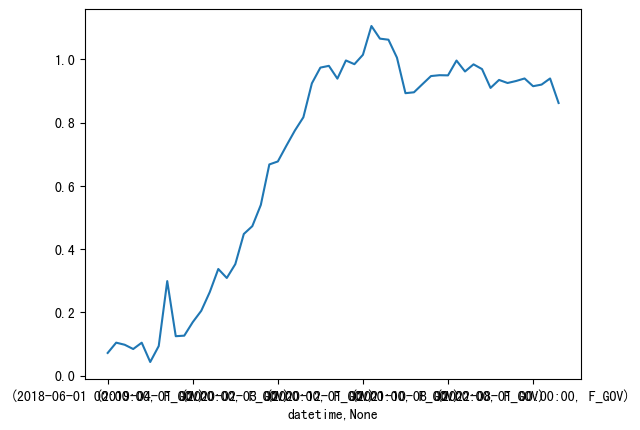

In [40]:
df_a = df_rolled_neu.groupby("datetime")[["F_GOV","RETURN"]].corr(method = "pearson").iloc[::2].drop("F_GOV",axis = 1)
df_a["RETURN"].cumsum().plot()